# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday Sep 20, 2021 at 11:59pm**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [2]:
spotify_df = pd.read_csv("spotify.csv", index_col = 0)

spotify_df


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)

print("training samples: " + str(df_train.shape[0]))
print("testing  samples: " + str(df_test.shape[0]))


training samples: 1613
testing  samples: 404


1613 training samples

404 testing samples

#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [4]:
df_stats = df_train.describe()


    




In [5]:
d = []
int = 0
list = df_stats.columns.values


for row in df_stats.items():
    d.append({
        list[int] : row[1]['max'] - row[1]['min']
    })

    int = int+1 
    
print(d)



[{'acousticness': 0.99399716}, {'danceability': 0.836}, {'duration_ms': 988585.0}, {'energy': 0.9814}, {'instrumentalness': 0.976}, {'key': 11.0}, {'liveness': 0.9501999999999999}, {'loudness': 30.364}, {'mode': 1.0}, {'speechiness': 0.5989}, {'tempo': 171.47199999999998}, {'time_signature': 4.0}, {'valence': 0.9367}, {'target': 1.0}]


speechiness has the smallest range of 0.5989

#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

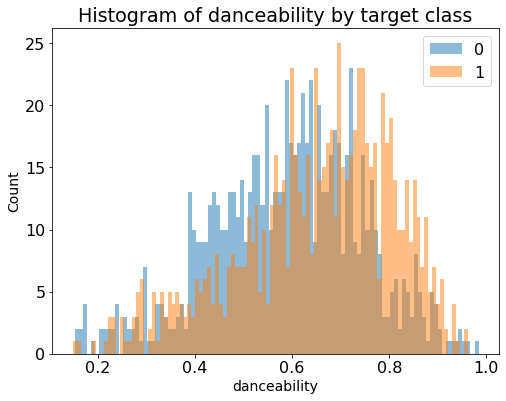

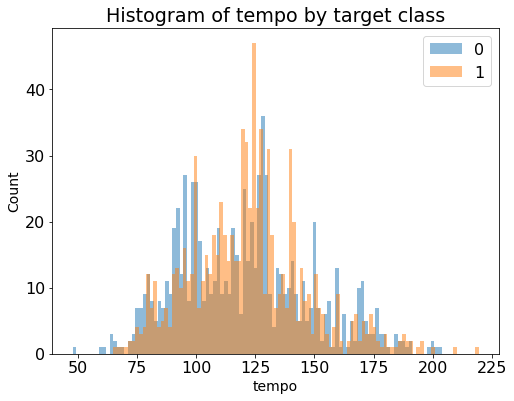

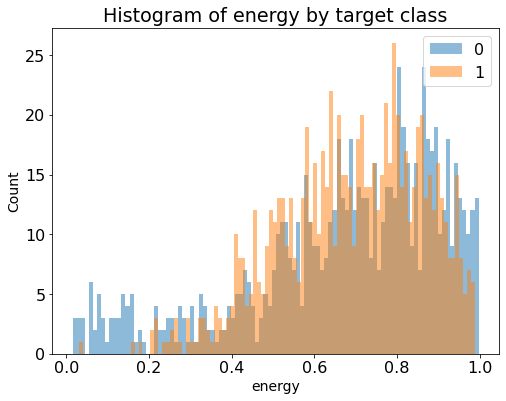

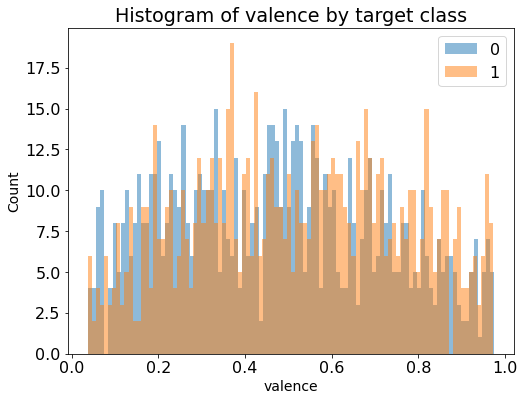

In [6]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

negative_examples['danceability']
labels = ["danceability", "tempo", "energy", "valence"]

for label in labels:
    plt.figure(figsize=(8, 6))
    plt.hist(negative_examples[label], bins=100, alpha=0.5, label="0")
    plt.hist(positive_examples[label], bins=100, alpha=0.5, label="1")
    plt.xlabel(label, size = 14)
    plt.ylabel("Count", size=14)
    plt.title("Histogram of " + label + " by target class")
    plt.legend(loc='upper right')


#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

** A reasonable split would be to predict 0 if the danceability <= 0.75( and predict 1 otherwise). I chose this feature because all the other features seem to follow a similar data distribution for both targets of 0 and 1. Hence, harder to set up a threshold for the classifier. While the danceability feature seems to have separate distributions. **

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



**Yes, having two identical target classes suggests that it will be difficult to find a threshold for which the model can accurately predict the correct value. There will not be a distinct pattern for the machine algorithm to learn. Hence, using the feature will not be useful.**

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [7]:
df_train[["song_title", "artist"]].head()

,song_title,artist
260,WTF (Where They From) [feat. Pharrell Williams],Missy Elliott
1286,"10,000 Reasons (Bless the Lord) [Radio Version]",Matt Redman
1344,American Dream,Chelsea Grin
1197,Feel This Moment,Pitbull
119,Trap Queen,Fetty Wap


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

**These features could be useful in predicting whether the user likes the song or not. For example, specific words in the song title might influence how listeners might like the song. Similarly, someone can like a song because it's their favourite artist. The difficulty in using these features for our model is that we would need to use a classifier instead of the regression model used for our other features.**

<br><br>

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [8]:
X_train = df_train.drop(columns=["song_title", "artist", "target"])
y_train = df_train['target']

X_test = df_test.drop(columns=["song_title", "artist", "target"])
y_test = df_test['target']

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

In [9]:
predictions = model.predict(X_train.iloc[[0]])
print(predictions)
print(y_train.iloc[0])


[1]
1


Prediction is correct, matches with y_train which is 1

#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [10]:
cvs_scores = cross_val_score(model, X_train, y_train, cv=10)

print(cvs_scores)
print("Average of cross validation scores: " + str(np.mean(cvs_scores)))

[0.68518519 0.65432099 0.66049383 0.75776398 0.76397516 0.57763975
 0.69565217 0.73913043 0.62111801 0.68944099]
Average of cross validation scores: 0.684472049689441


#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [11]:
cv_score = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)

pd.DataFrame(cv_score).mean()

fit_time       0.010803
score_time     0.001100
test_score     0.689437
train_score    0.998898
dtype: float64

**The training score is 0.998898 and the cross validation score is 0.683241. The cross validation score from 2c and 2d are different but miniscule. This is because when we call cross_validate and cross_val_score functions, each function will contain folds of different test data. So when we score the models with cross validation different values will come out.**

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

**There is significant different between the training score and cross-validation score of ~0.3. This occured because the model was trained to predict the quirks of the training data set and not the test set from cross validation. The model likely overfitted to the training model. **

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

The 10 folds accuracies varies a lot, so trustorthiness of the cross validation scores are low.

In [12]:
pd.DataFrame(cv_score)

,fit_time,score_time,test_score,train_score
0,0.011003,0.001000,0.691358,0.999311
1,0.013004,0.002001,0.648148,0.998622
2,0.012003,0.001000,0.666667,0.999311
3,0.010002,0.001000,0.714286,0.998623
4,0.011003,0.001001,0.739130,0.998623
5,0.011003,0.001000,0.627329,0.998623
6,0.010002,0.001000,0.770186,0.998623
7,0.010002,0.001000,0.726708,0.999311
8,0.010003,0.001000,0.645963,0.999311
9,0.010002,0.001000,0.664596,0.998623


## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

<AxesSubplot:title={'center':'Comparing Training and Cross Validation Score'}, xlabel='depth', ylabel='score'>

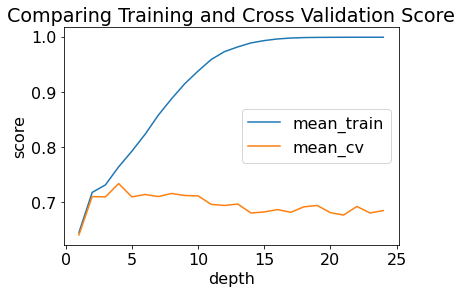

In [13]:
param_grid = {"max_depth": np.arange(1, 25)}
results_dict = {
    "depth": [],
    "mean_train": [],
    "mean_cv": [],
}

for depth in param_grid["max_depth"]:
    many_model = DecisionTreeClassifier(max_depth=depth)
    many_model.fit(X_train, y_train)
    scores = cross_validate(many_model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_cv"].append(np.mean(scores["test_score"]))
    results_dict["mean_train"].append(np.mean(scores["train_score"]))
    
results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")

results_df[["mean_train", "mean_cv"]].plot(xlabel = "depth", ylabel = "score", title='Comparing Training and Cross Validation Score')

#adapted from lecture 3 

**Increasing the max_depth hyperparameter will make the training score increase to 1. While the cross-validation score will increase until max_depth = 4 and will decrease or stay stagnant onwards. I would pick max_depth = 4 as the optimal depth. I think the depth I chose will be able to generalize other spotify data sets, however, I expect a lower accuracy than the cross-validation score when tested against other datasets.**

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [14]:
best_model = DecisionTreeClassifier(max_depth = 4)
best_model.fit(X_train, y_train)
print("Cross-validation score: " + str(best_model.score(X_test, y_test)))

Cross-validation score: 0.693069306930693


**The cross-validation score is about 0.73 and the tested score is 0.69, which is about a 0.04 difference. This suggests that the cross-validation data folds were similar to unseen data.**

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

**1. If we let y = 1 be true and y = -1 be false, then :

True Cases: 2 < 5.5

False Cases: 5 < 5.5, 4 < 5.5, 10 < 5.5, 9 < 5.5, 9 < 5.5

2. Training accuracy is 1/6 or 16.7%

3. No, as you can see, the training accuracy is not 100%.

 **


## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 